In [85]:
import os 
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt

cwd = os.getcwd() + os.path.sep

In [86]:
data = pd.read_csv(
    cwd + "JV150_protein_quant_21680.txt",
    sep="\t",
    index_col=0,
    encoding='cp1252')

In [87]:
wt_samples = [
    'WT_126_sn scaled',
    'WT_127n_sn scaled',
    'WT_127c_sn scaled',
    'WT_128n_sn scaled'
]
sit4_samples = [
    'sit4_130c_sn scaled',
    'sit4_131_sn scaled',
    'sit4_131c_sn scaled',
    'sit4_132n_sn scaled'
]

data_fc = data.copy()
data_fc['fc'] = np.log2(data[sit4_samples].sum(axis=1) / data[wt_samples].sum(axis=1))

up_reg = list(set(data_fc[data_fc['fc'] >= 2].index.tolist()))
len(up_reg)

51

In [88]:
up_reg = [x for x in up_reg if x != 'ALB']
print(len(up_reg))

50


In [89]:
data_up = data.copy()
data_up = data_up.groupby(level=0).mean()
data_up = data_up.reindex(up_reg, axis=0)
print(data_up.shape)

(50, 16)


In [107]:
sample_hex = {
    'WT_126_sn scaled':'#66c2a5', 
    'WT_127n_sn scaled':'#66c2a5',
    'WT_127c_sn scaled':'#66c2a5',
    'WT_128n_sn scaled':'#66c2a5',
    'mct1_128c_sn scaled':'#1b9e77',
    'mct1_129n_sn scaled':'#1b9e77',
    'mct1_129c_sn scaled':'#1b9e77',
    'mct1_130n_sn scaled':'#1b9e77',
    'sit4_130c_sn scaled':'#8da0cb',
    'sit4_131_sn scaled':'#8da0cb',
    'sit4_131c_sn scaled':'#8da0cb',
    'sit4_132n_sn scaled':'#8da0cb',
    'mct1sit4_132c_sn scaled':'#7570b3',
    'mct1sit4_133n_sn scaled':'#7570b3',
    'mct1sit4_133c_sn scaled':'#7570b3',
    'mct1sit4_134n_sn scaled':'#7570b3'
}

simp_sample_hex = {
    'WT':'#66c2a5', 
    'mct1':'#1b9e77',
    'sit4':'#8da0cb',
    'mct1sit4':'#7570b3'
}

sample_labels = data_up.T.copy()
sample_labels['label'] = sample_labels.index.map(sample_hex)
sample_labels = sample_labels[['label']]

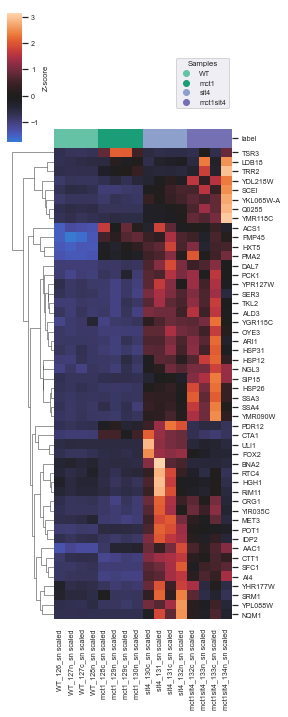

In [108]:
sns.set(font_scale=0.65)
sns.clustermap(
    data_up,
    z_score=0,
    row_cluster=True,
    col_cluster=False,
    center=0,
    cbar_kws={'label': 'Z-score'},
    col_colors=sample_labels,
    figsize=(4,10))

# Label legends
g = lambda m,c: plt.plot([],[],marker='o', color=c, ls="none")[0]
handles_g = [g("s", list(simp_sample_hex.values())[i]) for i in range(len(list(simp_sample_hex.values())))]
plt.legend(handles_g, list(simp_sample_hex.keys()), bbox_to_anchor=(11.75, 0.65), loc=2, borderaxespad=0., title='Samples')

#Save and show figure
plt.savefig(
    os.path.join(cwd, "sit4_upreg_protein_2021_01_27.pdf"),
    dpi=600,
    bbox_inches='tight')
plt.show()

### Group all proteins

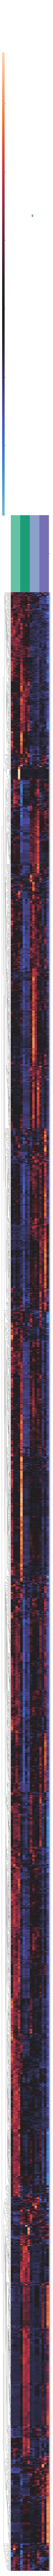

In [111]:
sns.set(font_scale=0.1)
sns.clustermap(
    data,
    z_score=0,
    row_cluster=True,
    col_cluster=False,
    center=0,
    cbar_kws={'label': 'Z-score'},
    col_colors=sample_labels,
    figsize=(4,200))

# Label legends
g = lambda m,c: plt.plot([],[],marker='o', color=c, ls="none")[0]
handles_g = [g("s", list(simp_sample_hex.values())[i]) for i in range(len(list(simp_sample_hex.values())))]
plt.legend(handles_g, list(simp_sample_hex.keys()), bbox_to_anchor=(11.75, 0.65), loc=2, borderaxespad=0., title='Samples')

#Save and show figure
plt.savefig(
    os.path.join(cwd, "sit4_upreg_protein_ALL_2021_01_27.pdf"),
    dpi=300,
    bbox_inches='tight')
plt.show()